<a href="https://colab.research.google.com/github/Safasal/DeepLearning/blob/main/Safa_Salh_CNN_Fruit360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Abstract:**

> In this assignment, I will use Convolutional Neural Network to classify images of Fruit from kaggle website. The dataset is called Fruit 360, it contains 90483 Images that are divided between a training and test sets of size (67692, 22688), the dataset have 131 number of classes, and the Image size is 100X100 pixels.


**Analysis of the Process**

- Importing the Libraries.
I will start by importing all required libraries. 

- Importing kaggle dataset in google colab. I will use simple steps to do that by create a kaggle account, Create New API Token, create new folder on my google drive and copy the kaggle.json in it, and then i use the below code to unzip the Fruit 360 file and then printing all dataset inside the dataset.



In [26]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive
from keras import backend as K
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"
%cd /content/gdrive/My Drive/Kaggle

[Errno 2] No such file or directory: '/content/gdrive/My Drive/Kaggle'
/content


In [4]:
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [5]:
for dirname, _, filenames in os.walk('fruits-360_dataset/fruits-360'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
fruits-360_dataset/fruits-360/Training/Passion Fruit/325_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/r_82_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/r_223_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/8_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/r_107_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/232_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/130_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/r_264_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/103_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/r_60_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/r_242_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/224_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/r_61_100.jpg
fruits-360_dataset/fruits-360/Training/Passion Fruit/r_58_100.jpg
fruits-360_dataset/fruits-360

- Load the data into train_path and test_path. I will display some of the images from the dataset. 

In [6]:
#Setting Training & Test dir paths
train_path = 'fruits-360_dataset/fruits-360/Training/'
test_path = 'fruits-360_dataset/fruits-360/Test/'

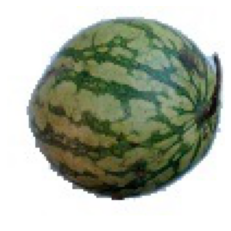

(100, 100, 3)


In [7]:
#Displaying the image
img = load_img(train_path + "Watermelon/r_33_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

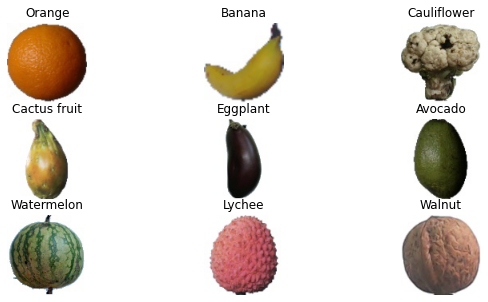

In [22]:
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/0_100.jpg", target_size=(100,100)))

- Check the number of classes.

In [11]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


- Create a deep learning model.
I will use sequential model with CONV2D layers and MaxPooling layers, and at the end i will use flatten layer, dropout and output layer with softmax activation.

In [45]:
#backend.clear_session()

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "adam",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 activation_54 (Activation)  (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 47, 47, 32)        9248      
                                                                 
 activation_55 (Activation)  (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                

- Set the number of epoch and batch size.

In [29]:
epochs = 20
batch_size = 64

- Generating Augmented Data.
while generating augmented images (that is adding modified copies of already existing data by applying a set of parameters), I will split the training data into training and validation to train the model.


In [59]:
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3,
validation_split=0.3)

test_datagen = ImageDataGenerator(rescale= 1./255)

val_datagen = ImageDataGenerator(rescale= 1./255, validation_split=0.3)

val_generator = val_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical",
shuffle=False,
subset='validation')

#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical",
subset='training')

test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
shuffle=False,
color_mode= "rgb",
class_mode= "categorical")



Found 20265 images belonging to 131 classes.
Found 47427 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [30]:
print(x.shape[:2])

(100, 100)


- Fitting the model. I will fit the model using the augmented images created earlier.

In [46]:
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = val_generator,
validation_steps = 800 // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
25/25 [==============================] - 28s 1s/step - loss: 4.8057 - accuracy: 0.0244 - val_loss: 4.6038 - val_accuracy: 0.0000e+00
Epoch 2/20
25/25 [==============================] - 27s 1s/step - loss: 4.1619 - accuracy: 0.0700 - val_loss: 3.8016 - val_accuracy: 0.1927
Epoch 3/20
25/25 [==============================] - 28s 1s/step - loss: 3.4164 - accuracy: 0.1575 - val_loss: 3.4507 - val_accuracy: 0.0000e+00
Epoch 4/20
25/25 [==============================] - 27s 1s/step - loss: 2.9004 - accuracy: 0.2450 - val_loss: 2.9188 - val_accuracy: 0.1875
Epoch 5/20
25/25 [==============================] - 27s 1s/step - loss: 2.4540 - accuracy: 0.3331 - val_loss: 2.3495 - val_accuracy: 0.2812
Epoch 6/20
25/25 [==============================] - 27s 1s/step - loss: 1.9962 - accuracy: 0.4212 - val_loss: 1.5033 - val_accuracy: 0.5547
Epoch 7/20
25/25 [==============================] - 28s 1s/step - loss: 1.7171 - accuracy: 0.4912 - val_loss: 1.7779 - val_accuracy: 0.7214
Epoch 8/20
2

- Pottng the loss and accuracy of the model

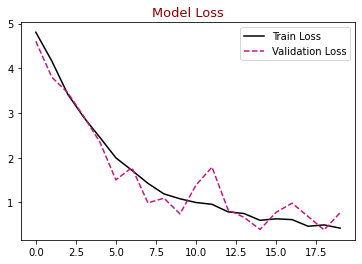

In [47]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

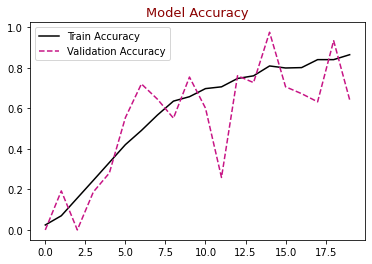

In [48]:

plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

- Evaluate the model.
The model gave an accuracy of 87. 

In [49]:
test_loss, test_acc= model.evaluate(test_generator)
print('test acc/loss:', test_acc, " ", test_loss)

355/355 [==============================] - 85s 239ms/step - loss: 0.4826 - accuracy: 0.8667
test acc/loss: 0.8667137026786804   0.48259344696998596


- In this section, I will use transfer learning using the inception v3 to create a model. I will unfreeze the last 4 layers from the inception v3 and then I will add (1 hidden layer, batch normalization technique, and an output layer with 131 class).
With this model the accuracy is 86.

In [34]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
image_size = 100

base_modelINC = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

87924736/87910968 [==============================] - 1s 0us/step


In [35]:
for layer in base_modelINC.layers[:-4]:
  layer.trainable=False
for layer in base_modelINC.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7ff7c15e08d0> False
<keras.layers.convolutional.Conv2D object at 0x7ff7bcc96c50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff7c99b0a50> False
<keras.layers.core.activation.Activation object at 0x7ff7c15a8b10> False
<keras.layers.convolutional.Conv2D object at 0x7ff7c1594d50> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff7c15a4e50> False
<keras.layers.core.activation.Activation object at 0x7ff7bcc77d50> False
<keras.layers.convolutional.Conv2D object at 0x7ff7c15a85d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7ff7c1591f50> False
<keras.layers.core.activation.Activation object at 0x7ff7c1576ed0> False
<keras.layers.pooling.MaxPooling2D object at 0x7ff7c15eb090> False
<keras.layers.convolutional.Conv2D object at 0x7ff7c155ef10> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7

In [36]:
base_modelINC.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 49, 49, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                       

In [37]:
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras import layers
from keras import models
from keras.layers import BatchNormalization

modelINC = models.Sequential()
modelINC.add(base_modelINC)
modelINC.add(layers.Flatten())
modelINC.add(layers.Dense(1042, activation='relu'))
modelINC.add(BatchNormalization())
modelINC.add(layers.Dense(131, activation='softmax'))

In [38]:
modelINC.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

history = modelINC.fit_generator(
        train_generator,
        epochs=5,
        validation_data=val_generator,
        verbose = 1,
        callbacks=[EarlyStopping(monitor='val_accuracy', patience = 5, restore_best_weights = True)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/5
742/742 [==============================] - 1280s 2s/step - loss: 0.5844 - accuracy: 0.8421 - val_loss: 0.5990 - val_accuracy: 0.8266
Epoch 2/5
742/742 [==============================] - 1231s 2s/step - loss: 0.2368 - accuracy: 0.9292 - val_loss: 0.5059 - val_accuracy: 0.8541
Epoch 3/5
742/742 [==============================] - 1220s 2s/step - loss: 0.1817 - accuracy: 0.9438 - val_loss: 0.6153 - val_accuracy: 0.8453
Epoch 4/5
742/742 [==============================] - 1212s 2s/step - loss: 0.1657 - accuracy: 0.9488 - val_loss: 0.5182 - val_accuracy: 0.8583
Epoch 5/5
742/742 [==============================] - 1211s 2s/step - loss: 0.1461 - accuracy: 0.9545 - val_loss: 0.4685 - val_accuracy: 0.8739


In [41]:
test_loss, test_acc= modelINC.evaluate(test_generator)
print('test acc/loss:', test_acc, " ", test_loss)

355/355 [==============================] - 390s 1s/step - loss: 0.5519 - accuracy: 0.8593
test acc/loss: 0.8592647910118103   0.5519130825996399


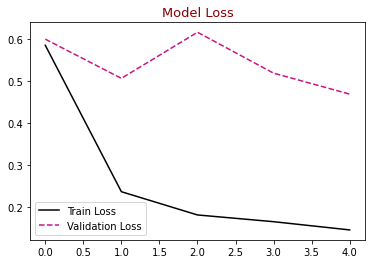

In [42]:
plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

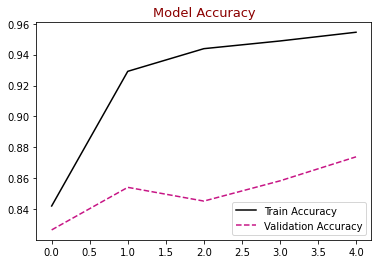

In [43]:
plt.figure()
plt.plot(history.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(history.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

- Predicting an image class using the first model.

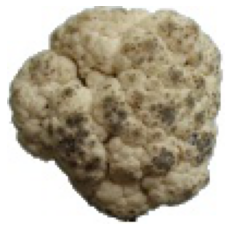

In [69]:
#Displaying the selected image
img = load_img(test_path + "Cauliflower/r2_209_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
 


In [72]:
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load('fruits-360_dataset/fruits-360/Test/Cauliflower/r2_209_100.jpg')

In [73]:
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

[25]


In [74]:
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

- Plotting the confusion matrix. 
I obtained the prediction and the classes to plot the heat map of the confusion matrix.

In [77]:
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

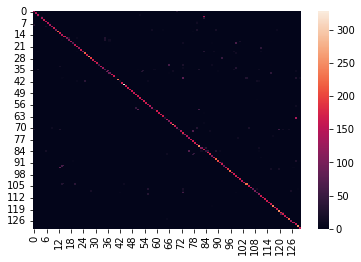

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm)

In [94]:
model.save('Fruit_360_CNN.h5')

**Summary:**

- I fetched the data directly from kaggle.
- I used data augmentation to improve the accuracy of our model, such as horizental flip and zoom.
- I displayed a set of images with its class name.
- I created validation data from the training data.
- The first model I created I used conv2d and maxpooling.
- The second model I used transfer learning (Inception v3) which gave better accuracy than the previous.
- I used batch normalization techniques to normalizes the outputs of the previous layer.
- I plotted the accuracy and loss for both models.
- I chose a picture and I used the first model to predict which class the picture belong. 
- plotting the confusion matrix of the classification model number 1.



**Conclusion:**

> I have been able to succesfully create two models with over 80% accuracy, and I also performed a succesful prediction of an image class using the model i created.



